<a href="https://colab.research.google.com/github/priyam314/Statistical-Machine-Learning/blob/master/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing all the required libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold,train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler,MaxAbsScaler,MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
%matplotlib inline
 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Data Preprocessing
* reading csv file
* dropping index value column
* splitting data
* feature scaling




In [ ]:
data=pd.read_csv("/Salary_Data.csv")
datatypes=dict(data.dtypes)
dependentVariable=len(datatypes)-1
countIndependentList=[]
countIndependent=-1
for key in datatypes:
  countIndependent+=1
  if (datatypes[key]==np.dtype('O')):
    key_new=pd.get_dummies(data[key],drop_first=True)
    data.drop([key],inplace=True,axis=1)
    data=pd.concat([data,key_new],axis=1)
    dependentVariable-=1
datatypes=dict(data.dtypes)
X=data.iloc[:,[i for i in range(len(datatypes)) if i!=dependentVariable]].values
Y=data.iloc[:,[dependentVariable]].values
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2,random_state=42)
train_y=train_y.reshape(-1,1)
sc=MinMaxScaler()
train_x = sc.fit_transform(train_x)
train_y=sc.fit_transform(train_y)
test_x=sc.fit_transform(test_x)
test_y=test_y.reshape(-1,1)
test_y=sc.fit_transform(test_y)
data_corr=data.corr()
# sns.boxplot(train_y[:,0])

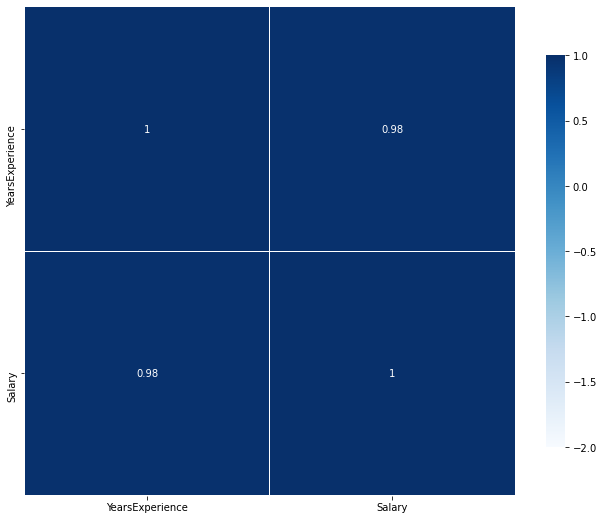

In [ ]:
fig, ax = plt.subplots(figsize=(11, 9))# plot heatmap
sns.heatmap(data_corr, cmap="Blues", vmin= -2.0, vmax=1,
           linewidth=0.1, cbar_kws={"shrink": .8},annot=True)
plt.show()


In [ ]:
score=[]

cv = KFold(n_splits=10, random_state=42)
maxx=0
for train_index, test_index in cv.split(train_x):
  # for j in range(1,5):
  # regrl = linear_model.Lasso(alpha=j/1000.0)
  # regrr = linear_model.Ridge(alpha=j/10.0)

  # yl=regrl.fit (train_x[train_index], train_y[train_index])
  # yr=regrr.fit (train_x[train_index], train_y[train_index])

  # print ('Coefficients : ', regr.coef_)
  # print ('Intercept: ',regr.intercept_)

  # predictionl= regrl.predict(train_x[test_index])
  # predictionr= regrr.predict(train_x[test_index])

  # train_score_l=regrl.score(train_x[train_index], train_y[train_index])
  # train_score_r=regrr.score(train_x[train_index], train_y[train_index])

  # test_score_l=regrl.score(train_x[test_index],train_y[test_index])
  # test_score_r=regrr.score(train_x[test_index],train_y[test_index])

  # print ('Train_Score lasso: ', train_score_l)
  # print ('Train_Score ridge: ', train_score_r)

  # print ('Test_Score lasso: ', test_score_l)
  # print ('Test_Score ridge: ', test_score_r)

  # test_prediction_l=regrl.predict(test_x)
  # test_prediction_r=regrr.predict(test_x)

  # print ('r2 lasso: ',r2_score(test_y,test_prediction_l))
  # print ('r2 ridge: ',r2_score(test_y,test_prediction_r))
  regr=linear_model.LinearRegression()
  y=regr.fit(train_x[train_index], train_y[train_index])
  prediction= y.predict(train_x[test_index])
  train_score=y.score(train_x[train_index], train_y[train_index])
  test_score=y.score(train_x[test_index],train_y[test_index])
  test_prediction=y.predict(test_x)
  r2_test=r2_score(test_y,test_prediction)
  mse_test=mean_squared_error(test_y,test_prediction)

  # print ('Train_Score: ', train_score)
  # print ("")
  # print ('Test_Score: ', test_score)
  # print ("")
  # print ('r2 : ',r2_test)  
  # print ('MSE : ',mse_test)  
  # print ("")
  # print ("")

  if (maxx<r2_test):
    maxx=r2_test
    intercept=y.intercept_
    coef=y.coef_
print('training score:',train_score,'\n','r2_score test set: ',maxx,'\n','intercept: ',intercept,'\n','coeficient: ',coef)

training score: 0.9748974892047155 
 r2_score test set:  0.9052123336882255 
 intercept:  [-0.01601161] 
 coeficient:  [[1.04102841]]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
